In [1]:
import lib.csv_helpers as csv
from IPython.display import display
import shutil

#Delete any existing dummy data
shutil.rmtree('dummydata')

## Generate Dummy Data
for testing / demo purposes.
Includes random surface chemistry mapping

In [9]:
import lib.csv_helpers as csv
from IPython.display import display

print("Generating metadata run list with the following settings")

# Start with the example setup dictionary
setup = csv.get_default_setup()

# Modify any of the example settings
setup['path'] = 'dummydata'
setup['subdirs'] = ['instrument', 'fluid']
setup['instrument']['sensor'] = 'DUM01'
setup['fluids'] = ['waterA', 'waterB']
setup['repeats'] = 2
setup['wavelength_range'] = [540, 730, 0.5]


display(setup)

run_df = csv.generate_run_df(setup)

# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=csv.dummy_measurement)
csv.write_instrument_json(setup)
csv.write_setup_json(setup)




Generating metadata run list with the following settings


{'metafile': 'index.txt',
 'path': 'dummydata',
 'subdirs': ['instrument', 'fluid'],
 'fluids': ['waterA', 'waterB'],
 'elements': 'all',
 'repeats': 2,
 'wavelength_range': [540, 730, 0.5],
 'primary_metadata': ['instrument', 'element', 'fluid'],
 'comment': '',
 'instrument': {'name': 'instrument01',
  'sensor': 'DUM01',
  'element_map': {'A01': 'Al',
   'A02': 'Au',
   'B01': 'Al-HMDS',
   'B02': 'Au-DT',
   'C01': 'Al-PEG',
   'C02': 'Au-PFDT'},
  'light Source': 'Stellarnet LED White',
  'spectrometer': 'Stellarnet BlueWave VIS-25'}}

INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-A01-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-A01-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-A02-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-A02-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-B01-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-B01-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-B02-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-B02-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-C01-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-C01-waterA.txt
INFO:root:Merging into existing dummydata/instrument01/waterA/instrument01-C02-waterA.txt
INFO:root:

## Preview of csv spectrometer data
Simply displaying a csv measurement file with pandas

In [10]:
import os
import pandas as pd

# pd.options.display.max_rows= 15
dir = "dummydata/instrument01/waterA/"
testfile = "instrument01-A01-waterA.txt"
df = pd.read_csv(os.path.join(dir, testfile), sep='\t')

#label columns
reps = len(df.columns)-1
col_names = ['wavelength']
for r in range(reps):
	col_names.append(F"rep{r+1}")
df.columns = col_names
df

,wavelength,rep1,rep2,rep3,rep4,rep5,rep6
0,540.0,0.636037,0.788888,0.368024,0.260227,0.879727,0.414196
1,540.5,0.824837,0.350953,0.167499,0.742324,0.216747,0.599098
2,541.0,0.760054,0.709233,0.832965,0.295608,0.993233,0.339023
3,541.5,0.488788,0.708132,0.009932,0.611666,0.970723,0.036914
4,542.0,0.882736,0.036596,0.955018,0.277749,0.138286,0.087521
...,...,...,...,...,...,...,...
375,727.5,0.343285,0.828136,0.817357,0.225698,0.090470,0.268875
376,728.0,0.244205,0.366858,0.277609,0.514266,0.484996,0.836082
377,728.5,0.975111,0.450919,0.923167,0.682250,0.185712,0.455857
378,729.0,0.870955,0.024156,0.164604,0.144436,0.718655,0.541955


## Import from .txt or .csv files

### Input File

Requires a text file with at least 2 columns.
(They don't need to be named in the file)

[wavelength]	[transmission data 1]	...[transmission data n (optional)]

The default is for tab separation, but can be specified with:

separator = '\t'

### Regex
A regular expression must be provided to identify these Primary metadata fields from the filename:
* sensor
* element
* fluid

Optionally, extra fields can be identified, which will be added to the metadata:
* e.g. rotation


In [12]:
import lib.csv_helpers as csv

#Folder containing text/csv files to import
input_dir = "/Users/calum/git/Glasgow/sampleData/combined"

# Construct a regex to extract metadata from the filename
# example 'HAN24_Sensor9_BeerBitter3_Rotation2.txt'
# regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(?P<rotation>.+).txt'
regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(.+).txt'

setup = csv.get_default_setup()

# Modify any of the example settings
setup['path'] = 'dummydata'
setup['instrument']['name'] = 'HAN24sample'
setup['instrument']['element_map'] = {
    '01'    : 'surfaceA',
    '02'    : 'surfaceB',
    '03'    : 'surfaceC',
    '04'    : 'surfaceD',
    '05'    : 'surfaceE',
    '06'    : 'surfaceF',
    '07'    : 'surfaceG',
    '08'    : 'surfaceH',
    '09'    : 'surfaceI',
    '10'    : 'surfaceJ',
    '11'    : 'surfaceK',
    '12'    : 'surfaceL',
    '13'    : 'surfaceM',
    '14'    : 'surfaceN',
    '15'    : 'surfaceO',
}

csv.import_dir_to_csv(setup, input_dir, regex)
csv.write_setup_json(setup)
csv.write_instrument_json(setup)


INFO:root:Saving into new file dummydata/HAN24sample/BeerBitter1/HAN24sample-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter1/HAN24sample-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Saving into new file dummydata/HAN24sample/BeerBitter2/HAN24sample-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter2/HAN24sample-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Saving into new file dummydata/HAN24sample/BeerBitter3/HAN24sample-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter3/HAN24sample-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Saving into new file dummydata/HAN24sample/BeerCorny1/HAN24sample-10-BeerCorny1.txt
INFO:root:Mergi

## Example of searching by metadata

select_from_metadata() returns a list of h5 nodes that match the
criteria.

It can search a full h5 file, or if a nodelist is provided, it will work from
that.

Search criteria must include a metadata key, and can optionally include a
metadata value

In [14]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

meta_df = csv.select_from_metadata('sensor', 'HAN24', meta_df)
meta_df = csv.select_from_metadata('element', '01', meta_df)

meta_df


INFO:root:filtering by metadata "sensor" == "HAN24"
INFO:root:filtering by metadata "element" == "01"


,date,instrument,sensor,element,surface,fluid,repeats,comment
index,,,,,,,,
HAN24sample-01-BeerBitter1,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerBitter1,6,<NA>
HAN24sample-01-BeerBitter2,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerBitter2,6,<NA>
HAN24sample-01-BeerBitter3,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerBitter3,6,<NA>
HAN24sample-01-BeerCorny1,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerCorny1,6,<NA>
HAN24sample-01-BeerCorny2,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerCorny2,6,<NA>
HAN24sample-01-BeerCorny3,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerCorny3,6,<NA>
HAN24sample-01-BeerMusty1,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerMusty1,6,<NA>
HAN24sample-01-BeerMusty2,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerMusty2,6,<NA>
HAN24sample-01-BeerMusty3,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerMusty3,6,<NA>


## Export with Preprocessing

export_dataframes() takes a meta_df listing which measurements to export.
(In this case we select only fluid==Beer from the full set)

A DataProcessor object may also be passed, which will be applied to the
measurements during export.




In [15]:
import lib.csv_helpers as csv
import lib.data_process

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)
# selection = csv.select_from_metadata('fluid', 'Beer', meta_df)
meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

dp = lib.data_process.DataProcessor()
dp.apply_normalise = True
dp.apply_smooth = True
dp.apply_trim = True
dp.apply_interpolate = True
dp.apply_round = True

dp.smooth_points = 3
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730
dp.round_decimals = 3
dp.interpolate_sampling_rate = 1.0

export = csv.export_dataframes(setup, meta_df, dp=dp, outfile='export.txt')
export


INFO:root:filtering by metadata "sensor" == "DUM01"
INFO:root:merging element A01
INFO:root:filtering by metadata "element" == "A01"
INFO:root:merging element A02
INFO:root:filtering by metadata "element" == "A02"
INFO:root:merging element B01
INFO:root:filtering by metadata "element" == "B01"
INFO:root:merging element B02
INFO:root:filtering by metadata "element" == "B02"
INFO:root:merging element C01
INFO:root:filtering by metadata "element" == "C01"
INFO:root:merging element C02
INFO:root:filtering by metadata "element" == "C02"
INFO:root:Writing to export.txt ...
INFO:root:Done


Surface          Al                                                          \
Element         A01                                                           
Wavelength    540.5  541.5  542.5  543.5  544.5  545.5  546.5  547.5  548.5   
waterA_rep01  0.743  0.713  0.725  0.567  0.753  0.541  0.871  0.483  0.575   
waterA_rep02  0.617  0.485  0.210  0.211  0.430  0.454  0.614  0.323  0.398   
waterA_rep03  0.460  0.604  0.805  0.884  0.667  0.673  0.410  0.451  0.893   
waterA_rep04  0.435  0.397  0.279  0.340  0.587  0.348  0.487  0.411  0.443   
waterA_rep05  0.697  0.701  0.413  0.581  0.529  0.738  0.590  0.401  0.524   
waterA_rep06  0.452  0.155  0.443  0.255  0.265  0.482  0.749  0.710  0.201   
waterB_rep01  0.393  0.372  0.656  0.630  0.323  0.624  0.364  0.487  0.353   
waterB_rep02  0.471  0.402  0.518  0.286  0.567  0.372  0.690  0.573  0.301   
waterB_rep03  0.818  0.587  0.372  0.638  0.792  0.429  0.387  0.367  0.480   
waterB_rep04  0.656  0.579  0.706  0.717  0.447  0.427  0.450  0.439  0.482   
waterB_rep05  0.549  0.678  0.248  0.333  0.642  0.671  0.246  0.339  0.421   
waterB_rep06  0.159  0.350  0.361  0.438  0.662  0.710  0.538  0.616  0.369   

Surface              ... Au-PFDT                                            \
Element              ...     C02                                             
Wavelength    549.5  ...   719.5  720.5  721.5  722.5  723.5  724.5  725.5   
waterA_rep01  0.600  ...   0.582  0.738  0.639  0.520  0.510  0.614  0.313   
waterA_rep02  0.337  ...   0.512  0.329  0.518  0.715  0.589  0.434  0.761   
waterA_rep03  0.563  ...   0.747  0.542  0.361  0.401  0.522  0.628  0.580   
waterA_rep04  0.580  ...   0.718  0.644  0.538  0.249  0.175  0.343  0.800   
waterA_rep05  0.521  ...   0.529  0.537  0.570  0.592  0.695  0.455  0.555   
waterA_rep06  0.574  ...   0.325  0.446  0.506  0.503  0.387  0.569  0.632   
waterB_rep01  0.247  ...   0.343  0.503  0.185  0.251  0.283  0.311  0.693   
waterB_rep02  0.602  ...   0.694  0.495  0.667  0.420  0.157  0.171  0.317   
waterB_rep03  0.429  ...   0.572  0.418  0.436  0.288  0.862  0.798  0.683   
waterB_rep04  0.382  ...   0.590  0.706  0.448  0.254  0.152  0.314  0.690   
waterB_rep05  0.327  ...   0.721  0.474  0.661  0.660  0.478  0.581  0.558   
waterB_rep06  0.442  ...   0.438  0.766  0.576  0.423  0.576  0.638  0.395   

Surface                            
Element                            
Wavelength    726.5  727.5  728.5  
waterA_rep01  0.446  0.432  0.647  
waterA_rep02  0.599  0.569  0.557  
waterA_rep03  0.501  0.169  0.441  
waterA_rep04  0.630  0.862  0.590  
waterA_rep05  0.338  0.286  0.604  
waterA_rep06  0.289  0.388  0.731  
waterB_rep01  0.432  0.443  0.607  
waterB_rep02  0.503  0.316  0.495  
waterB_rep03  0.580  0.802  0.660  
waterB_rep04  0.777  0.518  0.476  
waterB_rep05  0.705  0.287  0.332  
waterB_rep06  0.405  0.586  0.535  

[12 rows x 1134 columns]

## Process and Plot data

INFO:root:filtering by metadata "element" == "01"


instrument: HAN24sample
element: 01


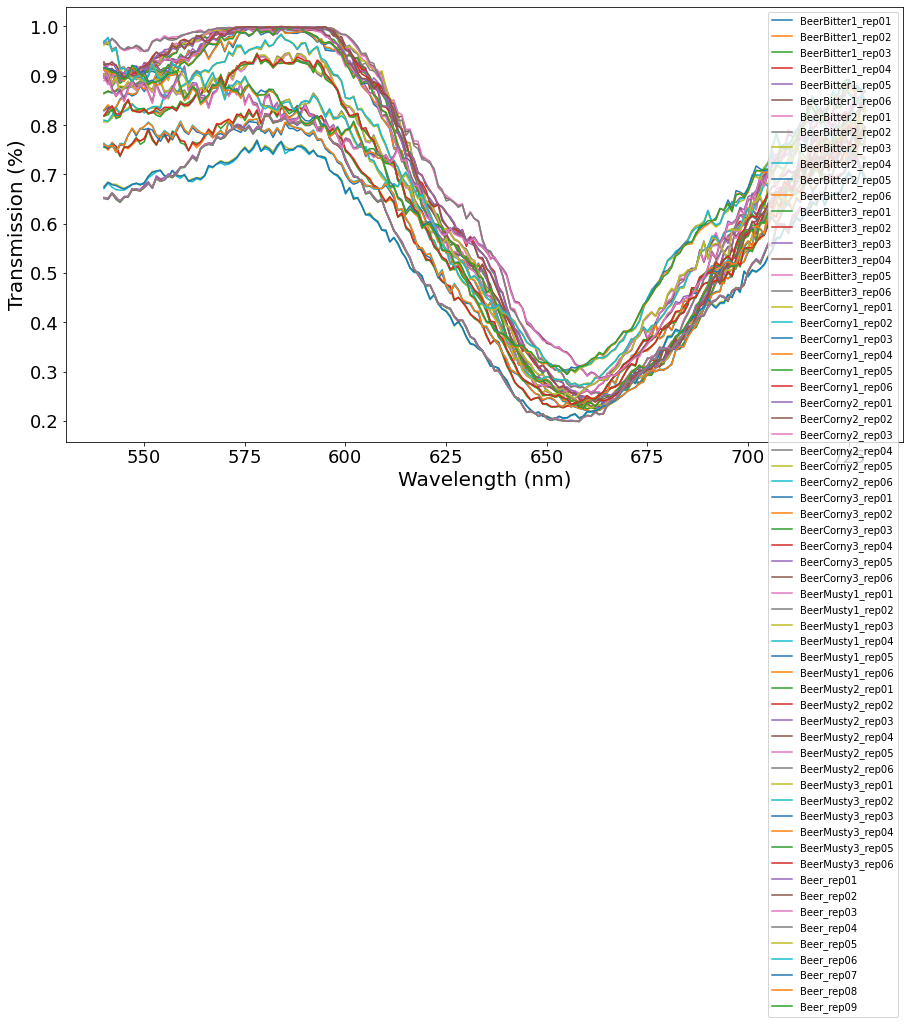

In [16]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = True
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = True

meta_df = csv.select_from_metadata('element', '01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

lib.data_process.plot(df)


## Bulk Process
copy one dataset into another, can also be used for modifying a folder structure

In [1]:
import os
import lib.csv_helpers as csv
import pandas as pd

path='./dummydata'
metapath = os.path.join(path, "index.txt")

setup_in = csv.get_default_setup()
setup_out = csv.get_default_setup()

setup_out['path'] = 'bulkmerge_output'
setup_out['subdirs'] = ['sensor', 'fluid']

csv.bulk_process(setup_in, setup_out, delete_input=False, merge_out=False)


ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-A01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-A02-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-B01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-B02-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-C01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set 

## Single Measurements

Run some dummy measurements at various wavelengths to check they merge correctly

In [18]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
element = 'A02'
fluid = 'asdf'

setup['wavelength_range'] = [400, 420, 0.5]
csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
setup['wavelength_range'] = [390, 410, 0.5]
df = csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
df




INFO:root:Saving into new file dummydata/instrument01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/instrument01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt


,wavelength,1647256382.994453,1647256383.020605
0,390.0,NaN,0.934341
1,390.5,NaN,0.159506
2,391.0,NaN,0.485793
3,391.5,NaN,0.118181
4,392.0,NaN,0.181326
5,392.5,NaN,0.432854
6,393.0,NaN,0.744847
7,393.5,NaN,0.435029
8,394.0,NaN,0.910408
9,394.5,NaN,0.973651
